<a href="https://colab.research.google.com/github/mohadesehsotoudehnia/FIS-projects/blob/main/miniProject2%20/%20MP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1**

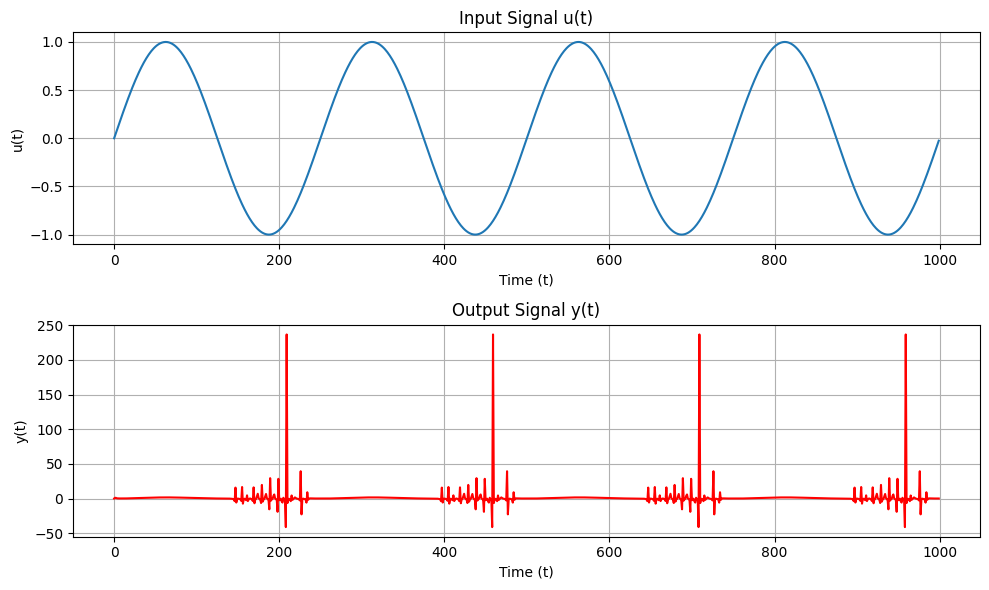

First few samples of X(t):
[[1.         0.         0.        ]
 [1.00001587 1.         0.0251301 ]
 [0.50013478 1.00001587 0.05024432]
 [0.25049282 0.50013478 0.07532681]
 [0.1679911  0.25049282 0.10036171]
 [0.1363087  0.1679911  0.12533323]
 [0.1200938  0.1363087  0.15022559]
 [0.11104914 0.1200938  0.17502306]
 [0.10710797 0.11104914 0.19970998]
 [0.10768278 0.10710797 0.22427076]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1000  # Number of samples
t = np.arange(T)  # Time vector
u = np.sin(2 * np.pi * t / 250)  # Input signal u(t) = sin(2πt/250)

# Initialize output y(t) with zeros
y = np.zeros(T)

# Initial conditions
y[0] = 0  # y(0)
y[1] = 1  # y(1)

# Generate the system output based on the given equation
for i in range(2, T):
    y[i] = y[i-1] / (1 + y[i-2]) + u[i-1]**3  # y(t) = y(t-1) / (1 + y(t-2)) + u(t-1)^3

# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, u, label='Input u(t)')
plt.title('Input Signal u(t)')
plt.xlabel('Time (t)')
plt.ylabel('u(t)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, y, label='Output y(t)', color='r')
plt.title('Output Signal y(t)')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Create the target X(t) = [y(t-1), y(t-2), u(t-1)]^T
X = np.vstack((y[1:T], y[0:T-1], u[0:T-1])).T

print("First few samples of X(t):")
print(X[:10])  # Display first 10 samples of X(t)


Training data (first 5 samples):
[[1.         0.         0.        ]
 [1.00001587 1.         0.0251301 ]
 [0.50013478 1.00001587 0.05024432]
 [0.25049282 0.50013478 0.07532681]
 [0.1679911  0.25049282 0.10036171]]

Testing data (first 5 samples):
[[-0.94332064 -2.4464702  -0.95105652]
 [-0.18638303 -0.94332064 -0.94299054]
 [-4.10401758 -0.18638303 -0.93432894]
 [-5.8358155  -4.10401758 -0.92507721]
 [ 1.11341777 -5.8358155  -0.91524117]]


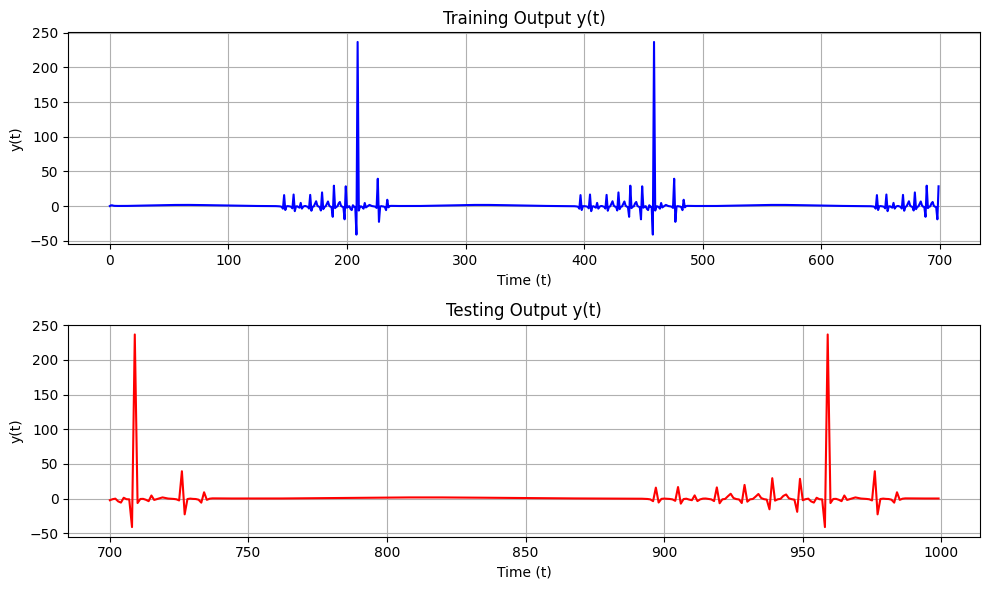

In [ ]:
# Split the data into training and testing sets
train_size = 700
test_size = T - train_size

X_train = X[:train_size]  # First 700 samples for training
X_test = X[train_size:]  # Last 300 samples for testing

# Display the first few samples of training and testing data
print("Training data (first 5 samples):")
print(X_train[:5])
print("\nTesting data (first 5 samples):")
print(X_test[:5])

# Plotting the training and testing split
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t[:train_size], y[:train_size], label='Training Output y(t)', color='b')
plt.title('Training Output y(t)')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t[train_size:], y[train_size:], label='Testing Output y(t)', color='r')
plt.title('Testing Output y(t)')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.grid(True)

plt.tight_layout()
plt.show()


# **3**

Best K: 10
RMSE for best K: 0.7238240187007571
RMSE for Training Set: 0.6962286049209857
RMSE for Test Set: 0.7243404315801992


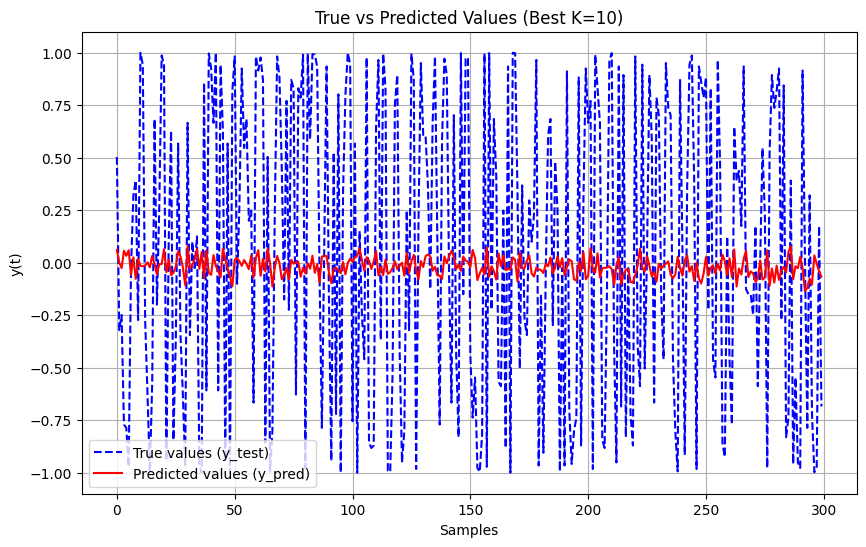

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the function to perform Linear Least Squares (LLS) training of the RBF network
def rbf_train(X_train, y_train, K, sigma=None):
    centers = X_train[np.random.choice(X_train.shape[0], K, replace=False)]  # Select K centers
    dist_matrix = np.linalg.norm(X_train[:, np.newaxis] - centers, axis=2)  # Calculate Euclidean distance

    # If sigma is not provided, calculate it based on the data
    if sigma is None:
        sigma = np.std(dist_matrix)  # Calculate sigma based on the standard deviation of distances

    phi = np.exp(-dist_matrix**2 / (2 * sigma**2))  # Compute RBF activations
    weights = np.linalg.pinv(phi).dot(y_train)  # Solve for weights using the least squares method
    return centers, sigma, weights

# Function for prediction using the trained RBF model
def rbf_predict(X, centers, sigma, weights):
    dist_matrix = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)  # Euclidean distance
    phi = np.exp(-dist_matrix**2 / (2 * sigma**2))  # Compute RBF activations
    return phi.dot(weights)  # Return predictions

# Preprocess data (scale the data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Select different values of K and choose the best one based on RMSE
K_values = [5, 10, 20, 30, 50, 100]  # Increase K to larger values for better fitting
best_rmse = float('inf')
best_K = 0
best_centers = None
best_weights = None
best_sigma = 0

# Try different values of K
for K in K_values:
    centers, sigma, weights = rbf_train(X_train, y_train, K)
    y_pred = rbf_predict(X_test, centers, sigma, weights)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))


    if rmse < best_rmse:
        best_rmse = rmse
        best_K = K
        best_centers = centers
        best_weights = weights
        best_sigma = sigma


y_pred_final = rbf_predict(X_test, best_centers, best_sigma, best_weights)

print(f"Best K: {best_K}")
print(f"RMSE for best K: {best_rmse}")

def compute_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

centers, sigma, weights = rbf_train(X_train, y_train, best_K)


y_train_pred = rbf_predict(X_train, centers, sigma, weights)

y_test_pred = rbf_predict(X_test, centers, sigma, weights)


train_rmse = compute_rmse(y_train, y_train_pred)
test_rmse = compute_rmse(y_test, y_test_pred)


print(f"RMSE for Training Set: {train_rmse}")
print(f"RMSE for Test Set: {test_rmse}")


plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values (y_test)', color='blue', linestyle='--')
plt.plot(y_pred_final, label='Predicted values (y_pred)', color='red', linestyle='-')
plt.title(f'True vs Predicted Values (Best K={best_K})')
plt.xlabel('Samples')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()


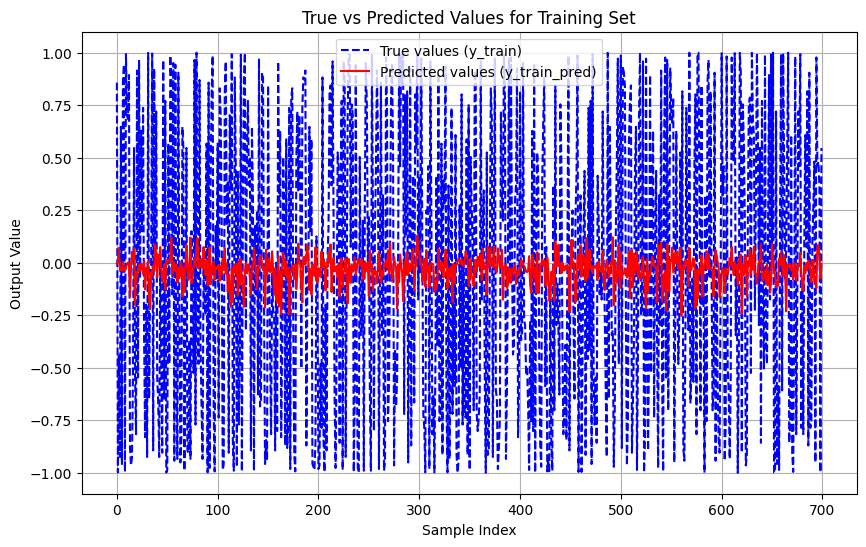

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='True values (y_train)', color='blue', linestyle='--')
plt.plot(y_train_pred, label='Predicted values (y_train_pred)', color='red', linestyle='-')
plt.title('True vs Predicted Values for Training Set')
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.legend()
plt.grid(True)
plt.show()
